## Predicting House Prices in King County: Evaluating the Impact of Home Features and Renovations using  Comprehensive Analysis of multiple linear regression.

### INTRODUCTION
The real estate market in King County is dynamic and competitive, with various factors influencing property values. Homeowners and real estate agencies are particularly interested in understanding how different features of a house, as well as renovations, can impact its market value. Accurate and data-driven insights into these factors can significantly enhance decision-making processes for buying, selling, and renovating homes.

### KEY OBJECTIVES
1. Create a Home Price Predictive Model:

Build and improve a regression model to precisely forecast King County real estate values depending on a range of property characteristics and remodeling factors.
Make that the model is reliable, strong, and has high predicted accuracy.

2. List the Main Factors Affecting Home Prices:

Determine which characteristics—such as location, number of bedrooms, and square footage—have the most effects on home pricing by analyzing the dataset.
Analyze the impact of particular improvements on home values, such as kitchen remodels and bathroom additions.

3. Give Homeowners Useful Information:

Utilize the model's output to provide homeowners with useful guidance on how to increase the market value of their property through well-chosen upgrades.
Determine which upgrades are most cost-effective and provide the best return on investment.

4. Facilitate Decision-Making in Real Estate Agencies:

Provide the real estate company with data-driven insights so that it may provide clients with more informed purchasing and selling advice.
Boost the agency's capacity to advise customers on the types of home upgrades that will most likely raise their property's worth.

### OUTLINE
1. Data analysis and cleaning: Outliers and missing values were handled as the King County House Sales dataset was loaded and cleaned.
2. Exploratory Data Analysis (EDA): Investigated the connections between attributes and prices and produced a visual representation of the distribution of home prices.
3. Determined the essential characteristics most closely correlated with home values.
4. Model Development: Three linear regression models were constructed and assessed.
5. Model Evaluation: R-squared (R²) and Mean Absolute Error (MAE) were used to evaluate the performance of the model.
6. Suggestions: gave homeowners and real estate agents practical advice on how to increase house values by emphasizing living space optimization and quality enhancements.


### DATA UNDERSTANDING

We will be using using data from the file ```kc_house_data.csv``` which contains the prices of houses in King County alongside their features such as year built, year renovated, number of bedrooms and bathrooms, and many more. The full listing of columns and descriptive statistics of the data is shown below.

In [82]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder


In [69]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [41]:
# Get the shape of dataframe
df.shape

(21597, 21)

There are 21597 rows in the data frame

There are 21 columns in the dataframe

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [43]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Building  first model

#### Data preparation

For the first model we chose to drop the following features.

In [44]:
df2 = df.copy()
df2 = df2.drop(['id', 'date', 'view', 'long', 'yr_renovated', 'grade', 'sqft_basement'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  float64
 7   condition      21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  zipcode        21597 non-null  int64  
 11  lat            21597 non-null  float64
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.3 MB


Checking for null values

In [45]:
df2.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
sqft_above          0
yr_built            0
zipcode             0
lat                 0
sqft_living15       0
sqft_lot15          0
dtype: int64

We decided to fill the null values of ```waterfront``` with its mean.

In [46]:
df2.fillna(value = df2['waterfront'].mean(),inplace=True)

In [47]:
x=df2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'yr_built', 'zipcode', 'lat',
       'sqft_living15', 'sqft_lot15']]

y=df2['price']

We split the data for training and testing.

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Modeling

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(x_train)

#### Regression results

In [52]:
print('R^2:', metrics.r2_score(y_train,y_pred))
print('Adjusted R^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))

R^2: 0.6515154531139891
Adjusted R^2: 0.6512530248506792


Plotting to see the collinearity between original prices and predicted prices.

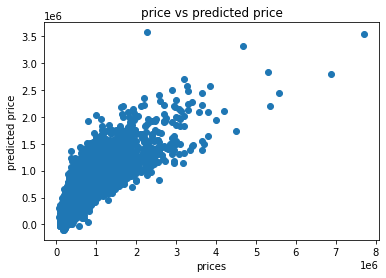

In [53]:
plt.scatter(y_train, y_pred)
plt.xlabel('prices')
plt.ylabel('predicted price')
plt.title('price vs predicted price')

plt.show()

With this model we got an rsquared value of 0.6515

### Building second model

We selected different features to try imporove the model performance.

#### Data prep

First fill all nulls with mean values

In [54]:
df3 = df.copy()
df3 = df3.fillna(df.mean())

In [55]:
df3.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Checking for high correlations between features

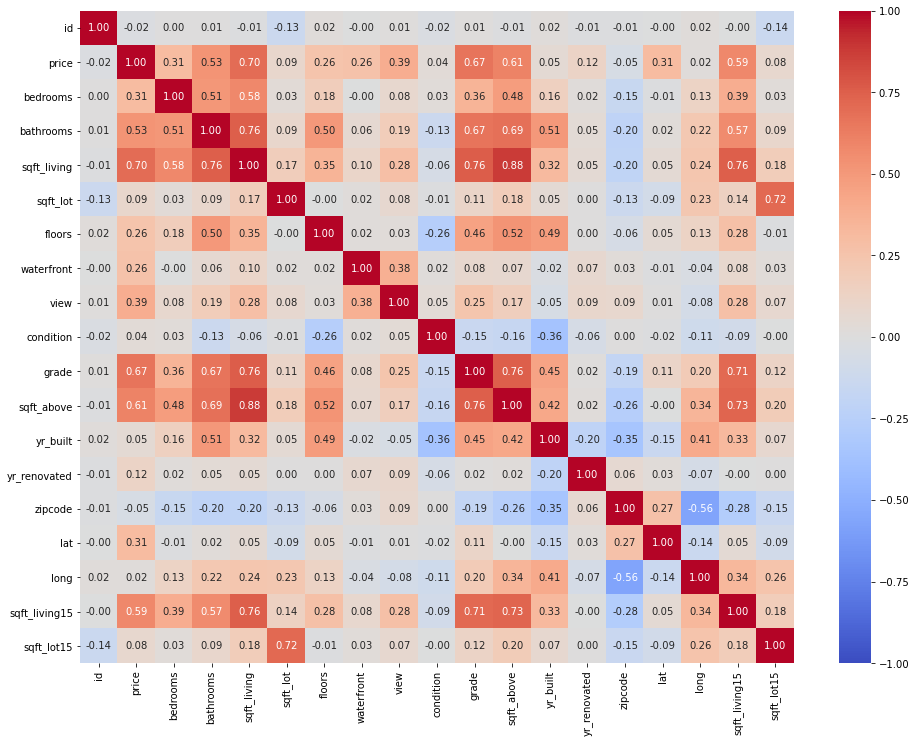

In [56]:
# Set the figure size
plt.figure(figsize=(16, 12))

# Create the heatmap
sns.heatmap(df3.corr(), cmap="coolwarm", annot=True, fmt=".2f", vmin=-1, vmax=1)

# Display the plot
plt.show();

Selected features based on high correlation with price

In [57]:
# Calculate the correlation matrix
correlation_matrix = df3.corr()

# Select features with high correlation with the target variable (price)
target_corr_threshold = 0.3  # You can adjust this threshold based on your criteria
high_corr_features = correlation_matrix.index[abs(correlation_matrix["price"]) > target_corr_threshold].tolist()

# Remove the target variable itself from the list
high_corr_features.remove("price")

# Check for multicollinearity by calculating correlation among the selected features
selected_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

# Print the selected features and their correlation with the target variable
print("Selected features based on high correlation with price:")
for feature in high_corr_features:
    print(f"{feature}: {correlation_matrix['price'][feature]:.2f}")

# Print the correlation matrix of the selected features to check for multicollinearity
print("\nCorrelation matrix of the selected features:")
print(selected_corr_matrix)
# Further refine the selected features by removing highly correlated pairs
multicollinearity_threshold = 0.8  # You can adjust this threshold based on your criteria
final_features = high_corr_features.copy()
for feature1 in high_corr_features:
    for feature2 in high_corr_features:
        if feature1 != feature2 and abs(selected_corr_matrix.loc[feature1, feature2]) > multicollinearity_threshold:
            if feature1 in final_features:
                final_features.remove(feature1)
            if feature2 in final_features:
                final_features.remove(feature2)

print("\nFinal selected features after removing multicollinearity:")
print(final_features)

Selected features based on high correlation with price:
bedrooms: 0.31
bathrooms: 0.53
sqft_living: 0.70
view: 0.39
grade: 0.67
sqft_above: 0.61
lat: 0.31
sqft_living15: 0.59

Correlation matrix of the selected features:
               bedrooms  bathrooms  sqft_living      view     grade  \
bedrooms       1.000000   0.514508     0.578212  0.078418  0.356563   
bathrooms      0.514508   1.000000     0.755758  0.186086  0.665838   
sqft_living    0.578212   0.755758     1.000000  0.281917  0.762779   
view           0.078418   0.186086     0.281917  1.000000  0.249244   
grade          0.356563   0.665838     0.762779  0.249244  1.000000   
sqft_above     0.479386   0.686668     0.876448  0.166054  0.756073   
lat           -0.009951   0.024280     0.052155  0.006131  0.113575   
sqft_living15  0.393406   0.569884     0.756402  0.279109  0.713867   

               sqft_above       lat  sqft_living15  
bedrooms         0.479386 -0.009951       0.393406  
bathrooms        0.686668  0.0242

Selected features 1 based on high correlation with price and removing multicollinearity

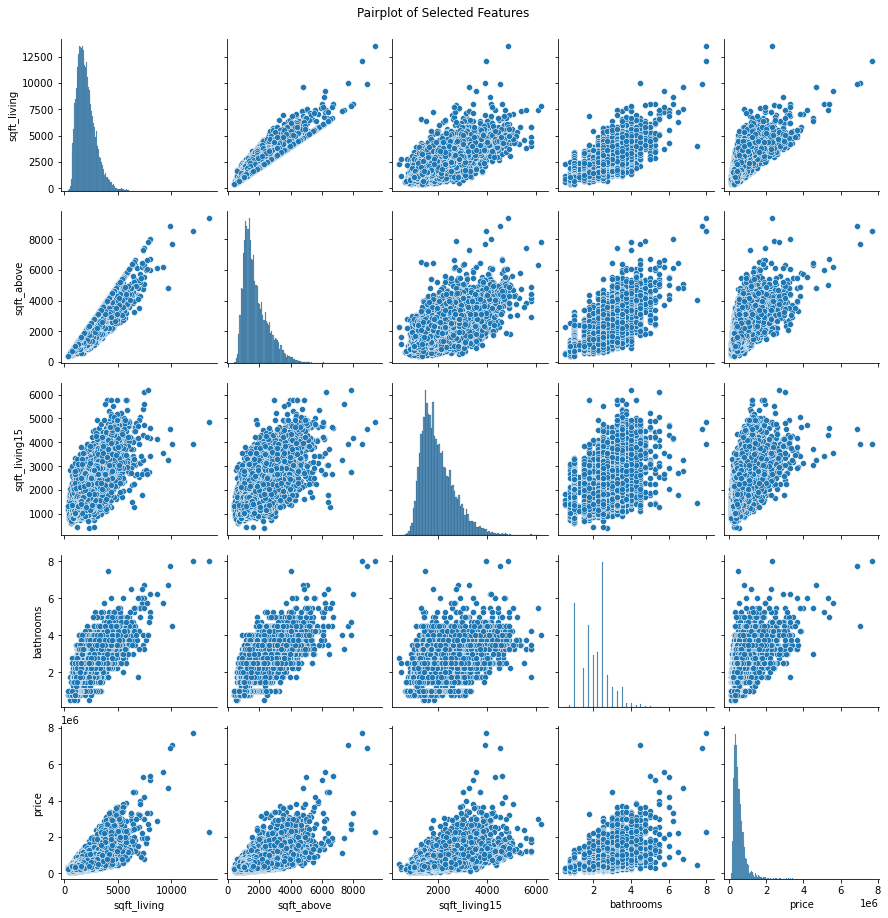

In [58]:
selected_features = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms']

# Create a pairplot
sns.pairplot(df3[selected_features + ['price']], diag_kind='auto')

# Display the plot
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show();

In [59]:
df3 = df3[selected_features]
df3.head()

,sqft_living,sqft_above,sqft_living15,bathrooms
0,1180,1180,1340,1.00
1,2570,2170,1690,2.25
2,770,770,2720,1.00
3,1960,1050,1360,3.00
4,1680,1680,1800,2.00


In [60]:
# Splitting data into training and testing set and scaling
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Standardizing data
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Modeling

In [61]:
# Initialize the model
model = LinearRegression()

# Training the model
model.fit(x_train_scaled, y_train)

LinearRegression()

In [62]:
# Predicting on the test data
y_pred = model.predict(x_test_scaled)

df10 = pd.DataFrame({"true":y_test, "pred":y_pred})
df10.head()

,true,pred
3686,132500.0,73545.664364
10247,415000.0,465660.640865
4037,494000.0,306331.133726
3437,355000.0,232848.284714
19291,606000.0,415663.579062


#### Regression Results

In [63]:
# validation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse", mse)
print("mae", mae)
print("R2", r2)

mse 46224932307.72862
mae 137856.89542827063
R2 0.6450141851120926


Checking how the predicted price compares to the actual price

We get an rsquared score of 0.645. We note that when selecting fewer features the performance of the model depreciates.

### Building model 3

We choose to include most features and see how the model performs

In [70]:
data = df.copy()

First drop null values and a few features deemed unnecessary

In [72]:
data.dropna(inplace=True)
data.drop(columns=["id", "date", "lat", "long", "sqft_basement"], axis=1, inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,0.0,98053,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1995,0.0,98003,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,1180,2008,0.0,98116,1330,1265
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,2009,0.0,98103,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,2014,0.0,98146,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,2009,0.0,98144,1020,2007


Remove outliers

In [76]:
def remove_outliers(cols, data):
    for col in cols:
        z = np.abs(stats.zscore(data[col]))
        outliers = data[z > 3]
        data = data.drop(outliers.index)
    
    return data

In [77]:
data = remove_outliers(["bedrooms", "bathrooms"], data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15593 entries, 1 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15593 non-null  float64
 1   bedrooms       15593 non-null  int64  
 2   bathrooms      15593 non-null  float64
 3   sqft_living    15593 non-null  int64  
 4   sqft_lot       15593 non-null  int64  
 5   floors         15593 non-null  float64
 6   waterfront     15593 non-null  float64
 7   view           15593 non-null  float64
 8   condition      15593 non-null  int64  
 9   grade          15593 non-null  int64  
 10  sqft_above     15593 non-null  int64  
 11  yr_built       15593 non-null  int64  
 12  yr_renovated   15593 non-null  float64
 13  zipcode        15593 non-null  int64  
 14  sqft_living15  15593 non-null  int64  
 15  sqft_lot15     15593 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 2.0 MB


In [78]:
X = data.drop("price", axis=1)
y = data["price"]

Split data into training and test sets

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Separate numerical and categorical features

In [80]:
continuous = ["sqft_lot", "sqft_above", "sqft_living15", "sqft_lot15", "sqft_living"]
categoricals = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade", "yr_built", "yr_renovated", "zipcode"]

#### Modeling 

In [83]:
# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

model3 = LinearRegression()
model3.fit(X_train, y_train)

y_hat_train = model3.predict(X_train)
y_hat_test = model3.predict(X_test)

#### Regression results

In [84]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test) 
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)
print('R2 score: ', r2_score(y_test, y_hat_test))

Train Mean Squared Error: 17486345287.75601
Test Mean Squared Error:  18148027874.011024
R2 score:  0.8273792560571032


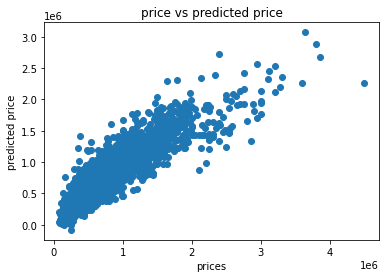

In [85]:
plt.scatter(y_train, y_hat_train)
plt.xlabel('prices')
plt.ylabel('predicted price')
plt.title('price vs predicted price')

plt.show()

We get an rsquared value of 0.82. We note that by including more features, we get a better performing model.

## Recommendations and Conclusion